In [5]:
# header files
import os
import sys
import glob
import math
from skimage import data, io
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [8, 8]
print("Header files loaded!")

Header files loaded!


In [2]:
# DATA
# BRAIN PHANTOM Images: 256x256, 512x512, 1024x1024, 2048x2048, 4096x4096
# SL PHANTOM Images: 256x256, 512x512, 1024x1024, 2048x2048, 4096x4096

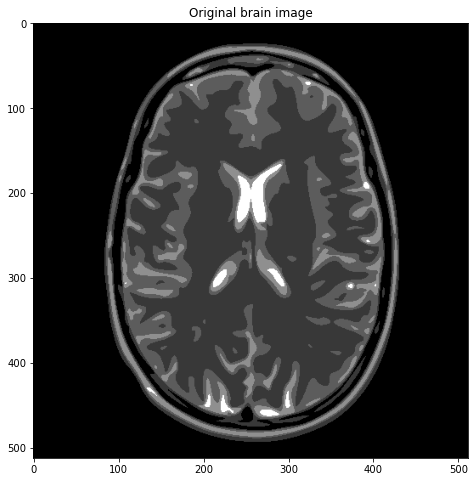

In [3]:
# view image
img_size = 512
FOV = 0.2
pixel_size = FOV/img_size

# load data file corresponding to the target resolution
mri_img = io.imread("../data/BrainPhantom512.png")

plt.figure()
plt.title("Brain Phantom, size = %s " % img_size)
if mri_img.ndim == 2:
    plt.imshow(mri_img, cmap=plt.cm.gray)
else:
    plt.imshow(mri_img)
plt.title("Original brain image")
plt.show()

In [4]:
# y = Fx + b
# x' = F'y

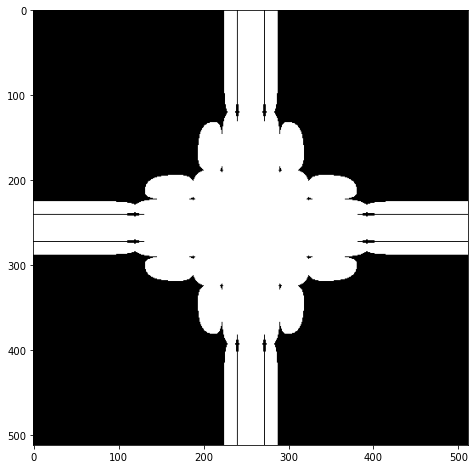

In [6]:
# variable density sampling mask (see Chauffert et al, IEEE ISBI 2013 for the computation of optimal sampling densities)
img_size = 512 
densities = loadmat("../data/2d_sampling_densities.mat")
opt_density = densities['distrib2d_N512_sym10']

# Generate Cartesian variable density mask from the above obtained densities
threshold = 10. * opt_density.min()
kspace_mask = np.zeros((img_size, img_size), dtype="float64")
kspace_mask = np.where(opt_density > threshold, 1, kspace_mask)

plt.imshow(kspace_mask, cmap=plt.cm.gray)

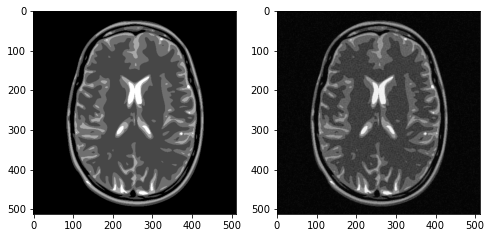

In [7]:
norm = "ortho"
def fft(x):
    return np.fft.fft2(x, norm=norm)

def ifft(x):
    return np.fft.ifft2(x, norm=norm)

kspace_data = np.fft.fftshift(fft(mri_img))
signoise = 10
kspace_data += np.random.randn(*mri_img.shape) * signoise * (1+1j)
kspace_data *= kspace_mask
image_rec0 = ifft(np.fft.ifftshift(kspace_data))

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(mri_img, cmap="Greys_r")
ax2.imshow(np.abs(image_rec0), cmap="Greys_r")